In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("Wholesale_customers_data.csv")

In [3]:
#Explore data
display(df.head(10))
display(df.shape)
display(df.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


(440, 8)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
# Create Horeca, Retail, Lisbon, Oporto, Others Columns
df.loc[df['Channel']==1, 'Horeca']=1
df.loc[df['Channel']!=1, 'Horeca']=0
df.loc[df['Channel']==2, 'Retail']=1
df.loc[df['Channel']!=2, 'Retail']=0
df.loc[df['Region']==1, 'Lisbon']=1
df.loc[df['Region']!=1, 'Lisbon']=0
df.loc[df['Region']==2, 'Oporto']=1
df.loc[df['Region']!=2, 'Oporto']=0
df.loc[df['Region']==3, 'Others']=1
df.loc[df['Region']!=3, 'Others']=0

In [14]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,2,3,12669,9656,7561,214,2674,1338,0.0,1.0,0.0,0.0,1.0
1,2,3,7057,9810,9568,1762,3293,1776,0.0,1.0,0.0,0.0,1.0
2,2,3,6353,8808,7684,2405,3516,7844,0.0,1.0,0.0,0.0,1.0
3,1,3,13265,1196,4221,6404,507,1788,1.0,0.0,0.0,0.0,1.0
4,2,3,22615,5410,7198,3915,1777,5185,0.0,1.0,0.0,0.0,1.0


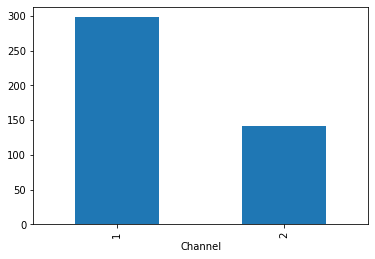

In [18]:
# Plot chart grouping by Channel 
df.groupby(df['Channel'])['Fresh'].count().plot.bar()
plt.show()

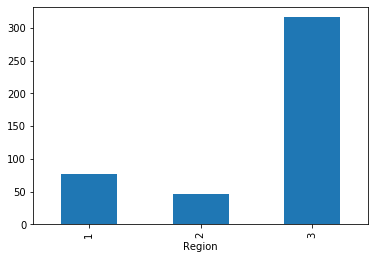

In [20]:
# Check region
df.groupby(df['Region'])['Fresh'].count().plot.bar()
plt.show()

In [21]:
# Since encoded as binary, drop Channel and Region
df = df.drop(['Channel','Region'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11918fd68>,
      dtype=object)

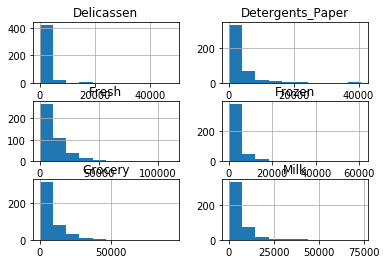

In [25]:
# Check distribution of grocery category customers
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].hist()

In [26]:
# Visualize with seaborn
import seaborn as sns

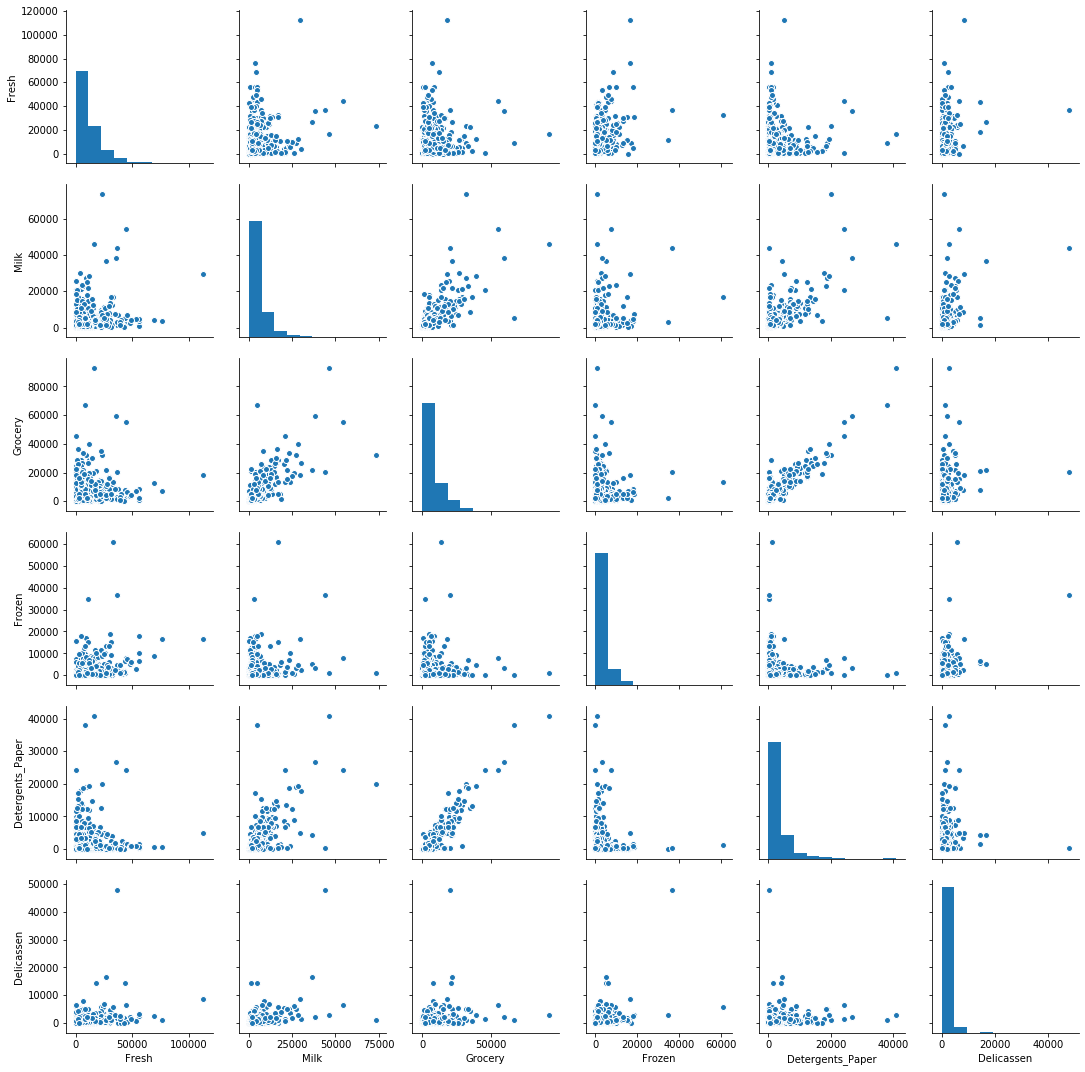

In [29]:
sns.pairplot(df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

In [30]:
# Prepare for clustering
from sklearn import cluster, datasets, decomposition, preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [32]:
# Must normalize before clustering
# Normalization puts everything on the same scale
# Without normalization, data would be biased towards Fresh
normalized = preprocessing.quantile_transform(df, output_distribution='normal')

/Users/juanvasquez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:2670: FutureWarning: The default value of `copy` will change from False to True in 0.23 in order to make it more consistent with the default `copy` values of other functions in :mod:`sklearn.preprocessing` and prevent unexpected side effects by modifying the value of `X` inplace. To avoid inplace modifications of `X`, it is recommended to explicitly set `copy=True`
  FutureWarning)
/Users/juanvasquez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (440). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [33]:
scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0,1)).fit(normalized)
scaled = scaler.transform(normalized)

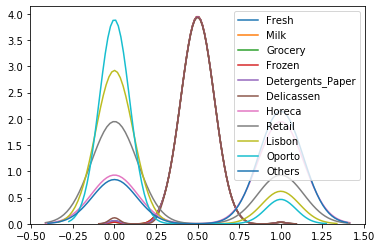

In [36]:
# Visualize with Seaborn
df_scaled = pd.DataFrame(scaled, columns=df.columns)
for i in df.columns:
    sns.kdeplot(df_scaled[i])

## 2 Clustering Methods

In [37]:
# Kmeans and Hierarchical Clustering
clusterer = KMeans(n_clusters=5, random_state=0)
cluster_labels= clusterer.fit_predict(df_scaled)
df['cluster'] = cluster_labels

In [38]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others,cluster
0,12669,9656,7561,214,2674,1338,0.0,1.0,0.0,0.0,1.0,2
1,7057,9810,9568,1762,3293,1776,0.0,1.0,0.0,0.0,1.0,2
2,6353,8808,7684,2405,3516,7844,0.0,1.0,0.0,0.0,1.0,2
3,13265,1196,4221,6404,507,1788,1.0,0.0,0.0,0.0,1.0,1
4,22615,5410,7198,3915,1777,5185,0.0,1.0,0.0,0.0,1.0,2


In [39]:
# Check how many customers per cluster
df.groupby(df['cluster'], as_index=False)['Fresh'].count()

,cluster,Fresh
0,0,59
1,1,211
2,2,105
3,3,28
4,4,37
